<a href="https://colab.research.google.com/github/katoyu/image-processing-100training/blob/master/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF71_80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow

!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_71_80/imori.jpg

--2019-05-07 07:02:28--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_71_80/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 (12K) [image/jpeg]
Saving to: ‘imori.jpg’

imori.jpg           100%[===================>]  12.34K  --.-KB/s    in 0s      

2019-05-07 07:02:33 (137 MB/s) - ‘imori.jpg’ saved [12638/12638]



#71 マスキング

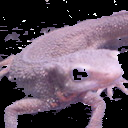

In [10]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32) / 255.

out = np.zeros_like(img)

max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
##if min == B
ind = np.where(min_arg==0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
##if min == G
ind = np.where(min_arg==2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
##if min == R
ind = np.where(min_arg==1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300

V = max_v.copy()
S = max_v.copy() - min_v.copy()

#color tracking
mask = np.zeros_like(H)
mask[np.where((H>180) & (H<260))] = 255
mask = 1- mask 
out = img.copy() * 255.

for c in range(3):
    out[..., c] *= mask

cv2_imshow(out)

#72 マスキング(カラートラッキング＋モルフォロジー)

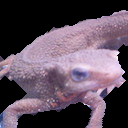

In [12]:
import cv2
import numpy as np

img = cv2.imread("imori.jpg").astype(np.float32) / 255.

out = np.zeros_like(img)

max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
##if min == B
ind = np.where(min_arg==0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
##if min == G
ind = np.where(min_arg==2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
##if min == R
ind = np.where(min_arg==1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300

V = max_v.copy()
S = max_v.copy() - min_v.copy()

# color tracking
mask = np.zeros_like(H)
mask[np.where((H>180) & (H<260))] = 255

h, w, _ = img.shape

# Closing
## Morphology filter
MF = np.array(((0, 1, 0),
               (1, 0, 1),
               (0, 1, 0)), dtype=np.int)

## Morphology - dilate
Dil_time = 5

for i in range(Dil_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
                mask[y-1, x-1] = 255
## Morphology - erode
Erode_time = 5

for i in range(Erode_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                mask[y-1, x-1] = 0

# Opening
## Morphology - erode
Erode_time = 5

for i in range(Erode_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                mask[y-1, x-1] = 0

## Morphology - dilate
Dil_time = 5

for i in range(Dil_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
                mask[y-1, x-1] = 255

# masking
cv2.imwrite("out_mask.png", mask.astype(np.uint8))

mask = 1 - mask / 255
out = img.copy() * 255.

for c in range(3):
    out[..., c] *= mask

out = out.astype(np.uint8)

cv2_imshow(out)

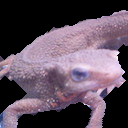

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("imori.jpg").astype(np.float32) / 255.

# RGB > HSV

max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
## if min == B
ind = np.where(min_arg == 0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
## if min == R
ind = np.where(min_arg == 2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
## if min == G
ind = np.where(min_arg == 1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
    
V = max_v.copy()
S = max_v.copy() - min_v.copy()

# color tracking
mask = np.zeros_like(H)
mask[np.where((H>180) & (H<260))] = 255

h, w, _ = img.shape

# Closing
## Morphology filter
MF = np.array(((0, 1, 0),
               (1, 0, 1),
               (0, 1, 0)), dtype=np.int)

## Morphology - dilate
Dil_time = 5

for i in range(Dil_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
                mask[y-1, x-1] = 255
## Morphology - erode
Erode_time = 5

for i in range(Erode_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                mask[y-1, x-1] = 0

# Opening
## Morphology - erode
Erode_time = 5

for i in range(Erode_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                mask[y-1, x-1] = 0

## Morphology - dilate
Dil_time = 5

for i in range(Dil_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
                mask[y-1, x-1] = 255

# masking
cv2.imwrite("out_mask.png", mask.astype(np.uint8))

mask = 1 - mask / 255
out = img.copy() * 255.

for c in range(3):
    out[..., c] *= mask

out = out.astype(np.uint8)

cv2_imshow(out)